We will predict petrol consumption using regression trees

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics

import warnings

In [4]:
warnings.filterwarnings("ignore")

In [5]:
ls

 Volume in drive D is Data
 Volume Serial Number is 8E17-3112

 Directory of D:\STUDY\DSP\Practise\Decision Trees\petrol_consumption

01-10-2020  20:52    <DIR>          .
01-10-2020  20:52    <DIR>          ..
01-10-2020  20:24    <DIR>          .ipynb_checkpoints
26-09-2020  12:57             1,389 petrol_consumption.csv
01-10-2020  20:52             1,188 Untitled.ipynb
               2 File(s)          2,577 bytes
               3 Dir(s)  520,263,196,672 bytes free


In [7]:
data = pd.read_csv('petrol_consumption.csv')

In [8]:
data.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


In [17]:
x=data[data.columns.difference(['Petrol_Consumption'])]
x.head(3)

,Average_income,Paved_Highways,Petrol_tax,Population_Driver_licence(%)
0,3571,1976,9.0,0.525
1,4092,1250,9.0,0.572
2,3865,1586,9.0,0.580


In [18]:
y=data['Petrol_Consumption']
y.head(3)

0    541
1    524
2    561
Name: Petrol_Consumption, dtype: int64

In [30]:
def train_test_data(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)
    print("Size of training Dataset: ",len(x_train))
    print("Size of test Dataset: ",len(x_test))
    return x_train,x_test,y_train,y_test


In [31]:
def build_tree(x,y,criteria):
    tree = DecisionTreeRegressor(criterion=criteria)
    fitted_tree = tree.fit(x,y)
    return fitted_tree

In [73]:
def make_prediction(tree,x):
    y_pred = tree.predict(x)
    return y_pred

In [74]:
def calculate_score(y_true,y_pred):
    print("RMSE :",np.sqrt(metrics.mean_squared_error(y_true,y_pred)))

#### Regression tree using 'mse' criterion

In [75]:
x_train,x_test,y_train,y_test = train_test_data(x,y)
mse_tree = build_tree(x_train,y_train,'mse')

print("Predicting for train dataset: ")
y_train_pred = make_prediction(mse_tree,x_train)

print("\nPredicting for test dataset: ")
y_test_pred = make_prediction(mse_tree,x_test)

print("\n Calculating Score for train dataset: \n")
calculate_score(y_train,y_train_pred)

print("\n Calculating Score for test dataset: \n")
calculate_score(y_test,y_test_pred)



Size of training Dataset:  33
Size of test Dataset:  15
Predicting for train dataset: 

Predicting for test dataset: 

 Calculating Score for train dataset: 

RMSE : 0.0

 Calculating Score for test dataset: 

RMSE : 107.25421514638326


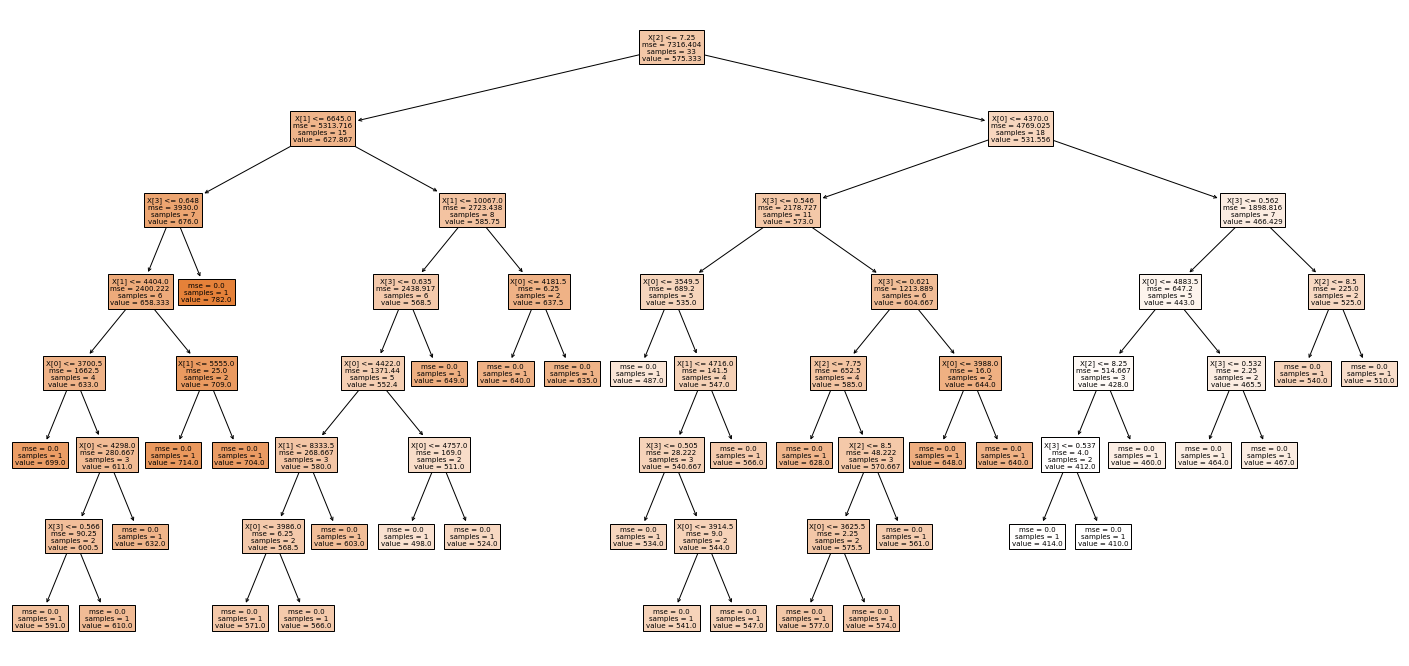

In [79]:
fig=plt.figure(figsize=(25,12))
_ = plot_tree(mse_tree,filled=True,impurity=True)

#### Regression tree using 'friedman_mse' criterion

In [83]:
friedman_mse_tree = build_tree(x_train,y_train,'friedman_mse')

print("Predicting for train dataset: ")
y_train_pred = make_prediction(friedman_mse_tree,x_train)

print("\nPredicting for test dataset: ")
y_test_pred = make_prediction(friedman_mse_tree,x_test)

print("\n Calculating Score for train dataset: \n")
calculate_score(y_train,y_train_pred)

print("\n Calculating Score for test dataset: \n")
calculate_score(y_test,y_test_pred)

Predicting for train dataset: 

Predicting for test dataset: 

 Calculating Score for train dataset: 

RMSE : 0.0

 Calculating Score for test dataset: 

RMSE : 131.78340816152337


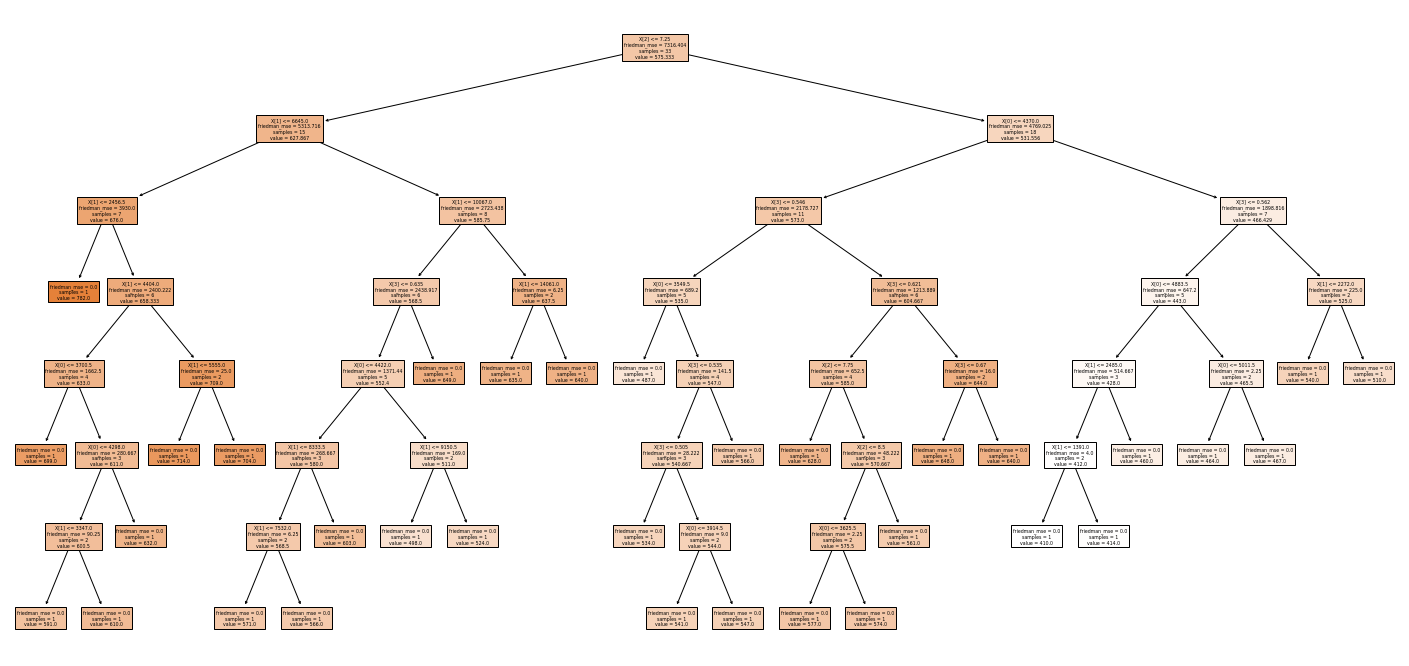

In [84]:
fig=plt.figure(figsize=(25,12))
_ = plot_tree(friedman_mse_tree,filled=True,impurity=True)

#### Regression tree using 'mae' criterion

In [86]:
mae_tree = build_tree(x_train,y_train,'mae')

print("Predicting for train dataset: ")
y_train_pred = make_prediction(mae_tree,x_train)

print("\nPredicting for test dataset: ")
y_test_pred = make_prediction(mae_tree,x_test)

print("\n Calculating Score for train dataset: \n")
calculate_score(y_train,y_train_pred)

print("\n Calculating Score for test dataset: \n")
calculate_score(y_test,y_test_pred)

Predicting for train dataset: 

Predicting for test dataset: 

 Calculating Score for train dataset: 

RMSE : 0.0

 Calculating Score for test dataset: 

RMSE : 109.20622692868754


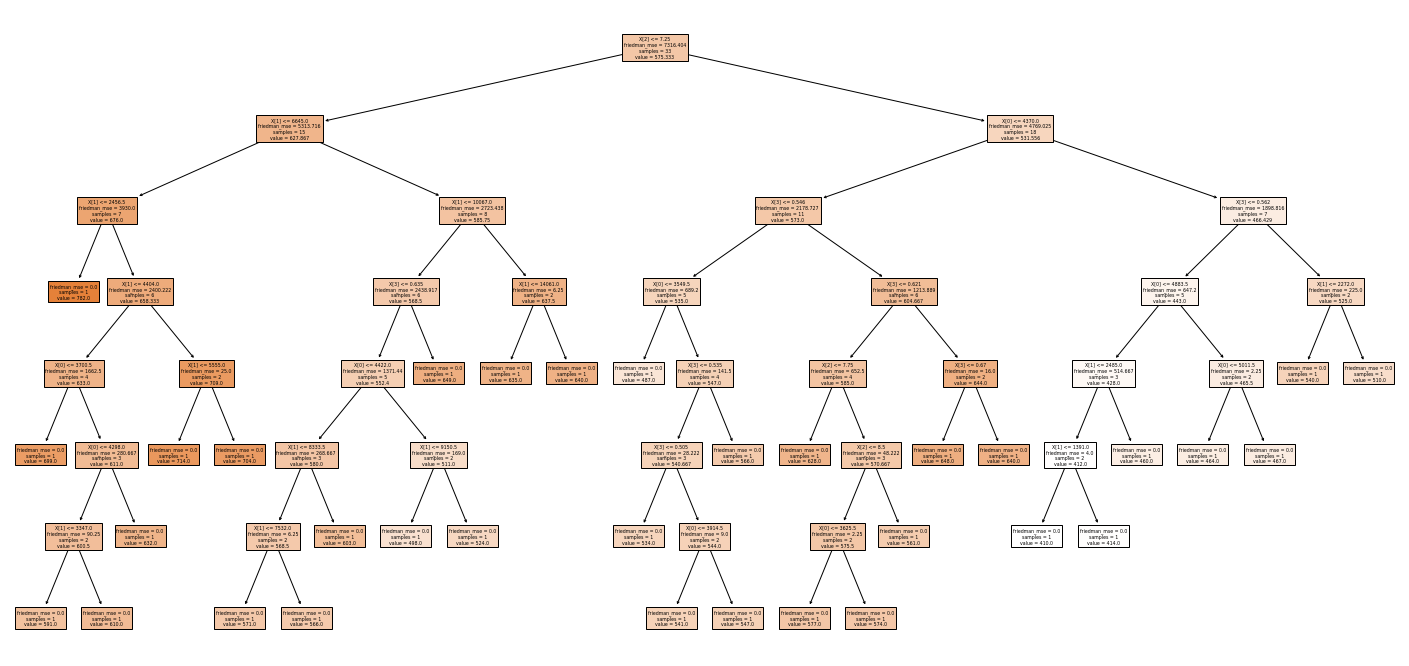

In [87]:
fig=plt.figure(figsize=(25,12))
_ = plot_tree(friedman_mse_tree,filled=True,impurity=True)

In [88]:
data.Petrol_Consumption.mean()

576.7708333333334

In [89]:
(107.4/576.77)*100

18.620940756280667

In [90]:
(131.78/576.77)*100

22.84792898382371

In [91]:
(109.2/576.77)*100

18.93302356225185

In [85]:
#{"mse", "friedman_mse", "mae"}